# ScikitLearnの学習 ( 回帰分析、次元圧縮、評価指標)

# ScikitLearnの学習 ( 回帰アルゴリズム )
回帰 - 連続値の目的変数を説明変数から予測する。
分類と違い、float値の連続値を求められるのがポイント。
回帰分析をすると説明変数の項に対応する係数を求めることで目的変数を予測できるようになる。

説明変数が1の場合は単回帰・

## 単回帰

In [2]:
#LinearRegression - 線形回帰分析のインスタンス
#今回はカルフォルニアの住宅価格をデータセットに用いる

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X,y = housing.data, housing.target

#train_test_split - 教師あり学習用のデータを学習用・テスト用に分割する
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#線形回帰のインスタンス
lr = LinearRegression()

#学習
lr.fit(X_train, y_train)

#テストデータの予測開始
y_pred = lr.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


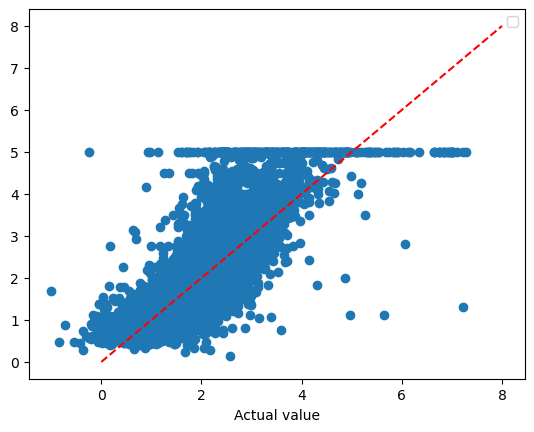

In [9]:
#実績値・予測値をプロット
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,8),(0,8), linestyle="dashed", color="red")

ax.set_xlabel("Predict")
ax.set_xlabel("Actual value")
ax.legend()
plt.show()

## 次元圧縮

データの次元を削減し、特徴量を抽出しやすくする。
データの次元数が1000・1万の場合、数個-数十個程の新しい特徴量に変換できる

## 主成分分析(Princilpal Component Analysis、PCA)
高次元なデータの統計的な分散が大きくなる方向を探し、その方向以外の次元を削減する手法。
データの本質となる統計的な値と特徴量を効率よく抽出できるようになる。

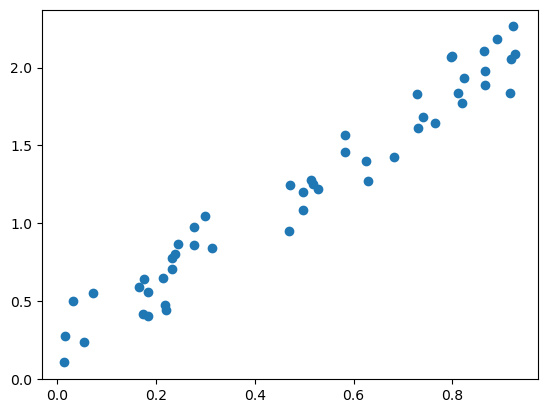

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#乱数シード
rng = np.random.default_rng(123)
#一様乱数を作成
X = rng.uniform(size=50)
#Xを二倍 + 一様乱数を足し合わせ直線上にバラツキのある散布図にする
Y = 2*X + 0.5*rng.uniform(size=50)

#散布図
fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [3]:
#主成分分析 - y方向の分散を削減する
from sklearn.decomposition import PCA

#PCAのインスタンス
pca = PCA(n_components=2)

#2次元ベクトルのデータでPCAを実行するには、データを2次元・2列の配列にする
X_prepca = np.hstack((X.reshape(-1,1), Y.reshape(-1,1)))

#主成分分析
X_pca = pca.fit_transform(X_prepca)

In [6]:
#データ数
print(len(X_prepca))
#最初の5行を表示
print(X_prepca[0:5])
print(X_pca[0:5])

50
[[0.68235186 1.42854889]
 [0.05382102 0.23642329]
 [0.22035987 0.4423103 ]
 [0.18437181 0.5592775 ]
 [0.1759059  0.63974834]]
[[-0.27111909  0.08158798]
 [ 1.07534363  0.02455641]
 [ 0.81795207  0.08679975]
 [ 0.72769106  0.00415947]
 [ 0.65861138 -0.03797397]]


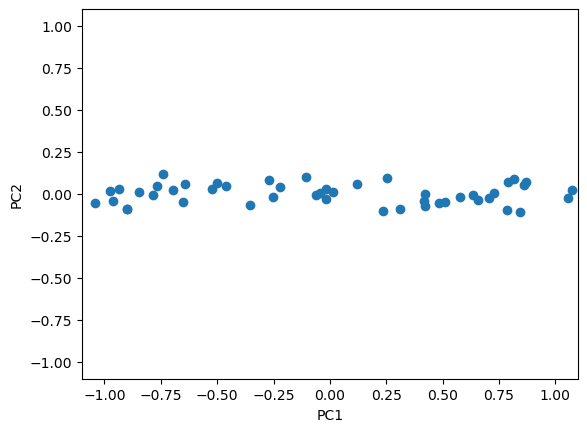

In [7]:
#主成分分析の結果(X_pca) をプロットする
fig, ax =plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.show()

# 評価指標
機械学習を行う際の「正しさ」「良さ」を評価する。機械学習の良し悪しは、一般的の次の2点を測定する
- カテゴリの分類精度の高さ
- 予測確立の正確さ

###　カテゴリ―分類精度
- 適合率
- 再現率
- F値
- 正解率
- 混合行列

混合行列は主にクラスが2つの場合に使われる。データの予測の正解・失敗を次の4カテゴリーに分ける
- TP 正と予測→正解
- FP 正と予測→実際には負
- FN 負と予測→実際には正
- TN 負と予測→正解

分類精度は次の4点を使って指標化する
- 適合率： TP/(TP+FP)
- 再現率： TP/(TP+FN)
- F値：    2 / (1/適合率 + 1/再現率)
- 正解率： (TP+TN)/(TP+FP+FN+TN)

In [8]:
# irisデータセットのSVM→評価指標の使い方を把握する

In [14]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()

#データを学習用・テスト用に
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#SVMで学習
svc = SVC()
svc.fit(X_train, y_train)

#テスト用データセットを予測
y_pred = svc.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [16]:
# 分類精度を表示 - metricモジュールのclassification_report関数を利用する
# accuracy-正解率、presision-適合率、recall-再現率、f1-F値、support-データの件数

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 交差検証
交差検証 - データを学習用・テスト用に分割する処理を繰り返しモデルの学習・評価を複数回行う。
機械学習では目的変数のクラスが一定割合となる、層化k分割交差検証という手法が使われる。
これは統計的な値に偏りが出ないようにするための層化抽出という統計手法となっている。

In [5]:
#サポートベクターマシン・交差検証のモジュール
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

iris = load_iris()

#データを学習用・テスト用に
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#SVMのインスタンス
svc = SVC()

#10回分割で交差検証を実施 - 検証時ごとの精度が10のリスト型として表示される
cross_val_score(svc, X, y ,cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [ ]:
## ROC曲線
データに対する予測確率の正確さの定量化には、ROC(Receriver Operating Characteristics)曲線、および
AUC(Area Under the Curve)曲線等を用いる。

In [ ]:
reshape(1,-1)とreshape(-1,1)とは

(1, -1) や (-1, 1) を指定すると，それぞれ2次元の横ベクトルや縦ベクトルを簡便に作ることができます。
1次元配列に対してreshape(1, -1)とすると、その配列を要素とする2次元1行の配列になります。
1次元配列に対してreshape(-1, 1)とすると、その配列を要素とする2次元1列の配列となります。 2次元1行の配列とする横ベクトルを作るには、1次元配列をreshape(1, -1)とすれば良いです。

import numpy as np
np.arange(6).reshape((1, -1))
出力

array([[0, 1, 2, 3, 4, 5]])
2次元1列の配列とする縦ベクトルを作るには、1次元配列をreshape(-1, 1)とすれば良いです。

np.arange(6).reshape((-1, 1))
出力

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])